### Regression

##### IMPORTING LIBRARIES

In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LinearRegression
from math import sqrt

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Data Reading

In [75]:
df=pd.read_csv(r"C:\Users\Admin\MLP\DATA\Data.csv")

In [78]:
df.columns

Index(['Unnamed: 0', 'FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth',
       'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'weatherCode', 'pressure', 'cloudcover', 'tempF',
       'WindChillF', 'time', 'precipMM', 'DewPointF', 'humidity',
       'windspeedKmph', 'visibility', 'WindGustKmph', 'winddirDegree', 'date',
       'airport'],
      dtype='object')

In [57]:
# df=df.drop(['Unnamed: 0'],axis=1)
df1=df[df.ArrDel15==1]
df1.shape

(388058, 31)

In [58]:
df1.isnull().sum()

Unnamed: 0         0
FlightDate         0
Quarter            0
Year               0
Month              0
DayofMonth         0
DepTime            0
DepDel15           0
CRSDepTime         0
DepDelayMinutes    0
OriginAirportID    0
DestAirportID      0
ArrTime            0
CRSArrTime         0
ArrDel15           0
ArrDelayMinutes    0
weatherCode        0
pressure           0
cloudcover         0
tempF              0
WindChillF         0
time               0
precipMM           0
DewPointF          0
humidity           0
windspeedKmph      0
visibility         0
WindGustKmph       0
winddirDegree      0
date               0
airport            0
dtype: int64

In [64]:
df1=df1.drop(['Unnamed: 0'],axis=1)
df1.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime',
       'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID',
       'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes',
       'weatherCode', 'pressure', 'cloudcover', 'tempF', 'WindChillF', 'time',
       'precipMM', 'DewPointF', 'humidity', 'windspeedKmph', 'visibility',
       'WindGustKmph', 'winddirDegree', 'date', 'airport'],
      dtype='object')

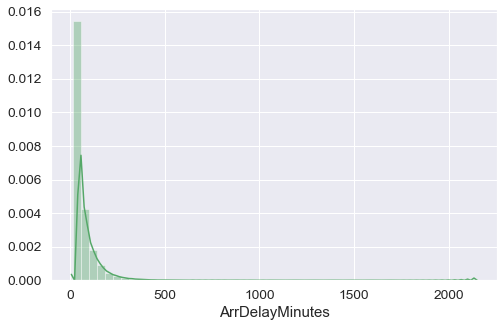

In [45]:
plt.figure(figsize=(8,5))
sns.distplot(df1['ArrDelayMinutes'],color='g')

##### There is no missing values!

#### Feature Engineering

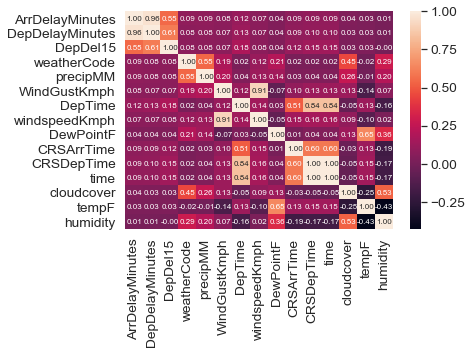

In [65]:
comat=df1.corr()
k=15
col=comat.nlargest(k,'ArrDelayMinutes')['ArrDelayMinutes'].index
cm=np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True, fmt='.2f', annot_kws={'size':8}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [66]:
features=['DepDelayMinutes','DepTime','CRSDepTime','precipMM','weatherCode','CRSArrTime','WindGustKmph','windspeedKmph','DewPointF','cloudcover','humidity','tempF']
prediction=['ArrDelayMinutes']

In [67]:
X=df1[features].values
y=df1[prediction].values

In [68]:
print("X-Shape:",X.shape)
print("Y-Shape:",y.shape)

X-Shape: (388058, 12)
Y-Shape: (388058, 1)


#### Train ,Test Split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

### Regressions:

#### 1.Linear Regression:

In [70]:
LR=LinearRegression()
reg=LR.fit(X_train,y_train)

In [71]:
p=LR.predict(X_test)

In [72]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(p,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(p,y_test)))
print("R2_SCORE:",metrics.r2_score(y_test,p))

MEAN ABSOLUTE ERROR: 14.706037924438764
ROOT MEAN SQUARE ERROR: 20.048139452560463
R2_SCORE: 0.921594623318835


#### 2.Extra Tree Regressor:

In [82]:
from sklearn.ensemble import ExtraTreesRegressor

In [83]:
ETR=ExtraTreesRegressor()
reg1=ETR.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [84]:
p1=ETR.predict(X_test)

In [85]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(p1,y_test))
print(" ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(p1,y_test)))
print("R2_SCORE:",metrics.r2_score(p1,y_test))

MEAN ABSOLUTE ERROR: 12.288769004793071
 ROOT MEAN SQUARE ERROR: 17.5012396537589
R2_SCORE: 0.9367059862242286


#### 3.XGBRegressor

In [79]:
import xgboost 
from xgboost import XGBRegressor
XGB=XGBRegressor()
reg2=XGB.fit(X_train,y_train)

In [80]:
pre=XGB.predict(X_test)

In [81]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pre,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pre,y_test)))
print("r2_SCORE:",metrics.r2_score(y_test,pre))

MEAN ABSOLUTE ERROR: 11.64085445505795
ROOT MEAN SQUARE ERROR: 16.82325212927793
r2_SCORE: 0.9447900182025937


#### 4.LASSO REGRESSION

In [73]:
from sklearn.linear_model import Lasso
LS=Lasso()
LS.fit(X_train,y_train)
pred=LS.predict(X_test)

In [74]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred,y_test)))
print("r2_SCORE:",metrics.r2_score(y_test,pred))

MEAN ABSOLUTE ERROR: 14.703951160776663
ROOT MEAN SQUARE ERROR: 20.04881525814758
r2_SCORE: 0.9215893372737318


#### Regression Analysis

### TABULAR VALUES OF REGRESSION -To choose the best

In [87]:
from tabulate import tabulate
table = [["Linear Regression",92.15,20.04,14.70],["ExtraTreeRegressor",93.67,17.50,12.28],["XGBRegressor",94.47,16.28,16.82,"BEST"],["LassoRegressor",92.15,20.04,14.70,]]
print(tabulate(table, headers=["REGRESSION","R2_SCORE", "RMSE","MAE","BETTER MODEL"]))

REGRESSION            R2_SCORE    RMSE    MAE  BETTER MODEL
------------------  ----------  ------  -----  --------------
Linear Regression        92.15   20.04  14.7
ExtraTreeRegressor       93.67   17.5   12.28
XGBRegressor             94.47   16.28  16.82  BEST
LassoRegressor           92.15   20.04  14.7


In [88]:
bool_series1 = df1[df1["ArrDelayMinutes"].between(0,550)] 
bool_series2 = df1[df1["ArrDelayMinutes"].between(550,1100)] 
bool_series3 = df1[df1["ArrDelayMinutes"].between(1150,1650)]
bool_series4 = df1[df1["ArrDelayMinutes"].between(1650,2200)] 

In [89]:
series=[bool_series1,bool_series2,bool_series3,bool_series4]

In [90]:
XGB=XGBRegressor()
LR=LinearRegression()

In [91]:
print("XGB REGRESSOR")
for j in series:
    data=j
    features1=['DepDelayMinutes','DepTime','CRSDepTime','precipMM','weatherCode','CRSArrTime','WindGustKmph','windspeedKmph','DewPointF','cloudcover','humidity','tempF']
    prediction1=['ArrDelayMinutes']
    X1=data[features1].values
    y1=data[prediction1].values
    X2_train,X2_test,y2_train,y2_test=train_test_split(X1,y1,test_size=0.30,random_state=10)
    XGB.fit(X2_train,y2_train)
    pred_1=XGB.predict(X2_test)
    LR.fit(X2_train,y2_train)
    pred_2=LR.predict(X2_test)
    print("RANGE:",data['ArrDelayMinutes'].min(),"-",data['ArrDelayMinutes'].max())
    print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred_1,y2_test))
    print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred_1,y2_test)))

XGB REGRESSOR
RANGE: 15.0 - 550.0
MEAN ABSOLUTE ERROR: 11.623725879498233
ROOT MEAN SQUARE ERROR: 16.706291841011073
RANGE: 550.0 - 1097.0
MEAN ABSOLUTE ERROR: 17.296859582815202
ROOT MEAN SQUARE ERROR: 24.039854060828304
RANGE: 1150.0 - 1649.0
MEAN ABSOLUTE ERROR: 30.62341839334239
ROOT MEAN SQUARE ERROR: 39.48341775786483
RANGE: 1711.0 - 2142.0
MEAN ABSOLUTE ERROR: 85.5
ROOT MEAN SQUARE ERROR: 90.12529934246122


#### PIPELINE

In [92]:
features2=['DepDelayMinutes','DepTime','CRSDepTime','precipMM','weatherCode','CRSArrTime','WindGustKmph','windspeedKmph','DewPointF','cloudcover','humidity','tempF']
prediction2=['ArrDelayMinutes']
X2=df1[features2].values
y2=df1[prediction2].values
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
X3_train, X3_test, y3_train, y3_test = train_test_split(X2,y2,test_size=0.2, random_state=30)
pipe = Pipeline([('scaler', StandardScaler()), ('XGB',XGBRegressor())])
pipe.fit(X3_train,y3_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [93]:
pipe.score(X3_test, y3_test)

0.9438218116575812

In [94]:
pred_5=pipe.predict(X3_test)

In [95]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred_5,y3_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred_5,y3_test)))
print("r2_SCORE:",metrics.r2_score(y3_test,pred_5))

MEAN ABSOLUTE ERROR: 11.627398850468946
ROOT MEAN SQUARE ERROR: 16.77947422683909
r2_SCORE: 0.9438218116575812


In [96]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('LR',LinearRegression())])
pipe1.fit(X3_train,y3_train)
pred_6=pipe1.predict(X3_test)

In [97]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred_6,y3_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred_6,y3_test)))
print("r2_SCORE:",metrics.r2_score(y3_test,pred_6))

MEAN ABSOLUTE ERROR: 14.698729571797893
ROOT MEAN SQUARE ERROR: 20.032681713927264
r2_SCORE: 0.9199264257223005


In [98]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('LR',Lasso())])
pipe2.fit(X3_train,y3_train)
pred_7=pipe2.predict(X3_test)

In [99]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred_7,y3_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred_7,y3_test)))
print("r2_SCORE:",metrics.r2_score(y3_test,pred_7))

MEAN ABSOLUTE ERROR: 14.720671123617704
ROOT MEAN SQUARE ERROR: 20.132646171401838
r2_SCORE: 0.9191252865581954


In [100]:
pipe3 = Pipeline([('scaler', StandardScaler()), ('ETR',ExtraTreesRegressor())])
pipe3.fit(X3_train,y3_train)
pred_8=pipe3.predict(X3_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [101]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred_8,y3_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred_8,y3_test)))
print("r2_SCORE:",metrics.r2_score(y3_test,pred_8))

MEAN ABSOLUTE ERROR: 12.277769674792559
ROOT MEAN SQUARE ERROR: 17.432069904799004
r2_SCORE: 0.9393670148206309


In [103]:
from tabulate import tabulate
table1 = [["Linear Regression",91.99,20.03,14.69],["ExtraTreeRegressor",93.93,17.43,12.27],["XGBRegressor",94.38,16.77,11.62,"BEST"],["LassoRegressor",91.91,20.13,14.69,]]
print(tabulate(table1, headers=["REGRESSION","R2_SCORE", "RMSE","MAE","BETTER MODEL"]))

REGRESSION            R2_SCORE    RMSE    MAE  BETTER MODEL
------------------  ----------  ------  -----  --------------
Linear Regression        91.99   20.03  14.69
ExtraTreeRegressor       93.93   17.43  12.27
XGBRegressor             94.38   16.77  11.62  BEST
LassoRegressor           91.91   20.13  14.69


###### Root Mean Square And Mean Absolute Error has good values for all the range.The above results shows the values of regression which have better r2 score,RMSE and MAE.Among the four regressions 'XGBOOST' preforms  better.The values of XGBoost have low error when compared to other regression model,and model fits better for dependent variable.